In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import statistics as st

In [25]:
img = '4.jpg'

1 - Conversão RGB-YIQ-RGB

In [26]:
def split_rgb(imgarr, width, height):                #SEPARA OS CANAIS RGB DA IMAGEM
    print('SEPARANDO E EXIBINDO CANAIS RGB')
    red = imgarr.copy()
    green = imgarr.copy()
    blue = imgarr.copy()

    for i in range(width):
        for j in range(height):
            red[j][i][1] = 0
            red[j][i][2] = 0
            green[j][i][0] = 0
            green[j][i][2] = 0
            blue[j][i][0] = 0
            blue[j][i][1] = 0
    
    fig = plt.figure(figsize=(30, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(red)
    plt.axis('off')
    plt.title("Red")
    save(red, 'img_red_channel', 'jpg')

    fig.add_subplot(1, 3, 2)
    plt.imshow(green)
    plt.axis('off')
    plt.title("Green")
    save(green, 'img_green_channel', 'jpg')

    fig.add_subplot(1, 3, 3)
    plt.imshow(blue)
    plt.axis('off')
    plt.title("Blue")
    save(blue, 'img_blue_channel', 'jpg')
        
    return red, green, blue

In [27]:
def open_img(arqv):
    print('ABRINDO ARQUIVO')
    name = arqv.split(".")[0]
    filetype = arqv.split(".")[1]

    img = Image.open(arqv)
    print(img.format, img.size, img.mode)
    imgarr = np.array(img)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original")

    return name, filetype, imgarr, img.size[0], img.size[1]

In [28]:
def save(arr, name, filetype):
    arqv = Image.fromarray(arr)
    arqv.save(name + '.' + filetype)

In [29]:
def rgb_yiq(red, green, blue, width, height):
    print('CONVERTENDO DE RGB PARA YIQ')
    yiq = np.zeros((height, width, 3))

    for z in range(width):
        for j in range(height):
            r = red[j][z][0]
            g = green[j][z][1]
            b = blue[j][z][2]

            y = (0.299*r) + (0.587*g) + (0.114*b)
            i = (0.596*r) - (0.274*g) - (0.322*b)
            q = (0.211*r) - (0.523*g) + (0.312*b)

            yiq[j][z][0] = y
            yiq[j][z][1] = i
            yiq[j][z][2] = q  
    
    return yiq

In [30]:
def yiq_rgb(yiq, width, height):
    print('CONVERTENDO DE YIQ PARA RGB')
    aux = np.zeros((height, width, 3), dtype=np.uint8)

    for z in range(width):
        for j in range(height):
            y = yiq[j][z][0]
            i = yiq[j][z][1]
            q = yiq[j][z][2]

            r = round((1.000*y) + (0.956*i) + (0.621*q))
            g = round((1.000*y) - (0.272*i) - (0.647*q))
            b = round((1.000*y) - (1.106*i) + (1.703*q))

            if r>255:
                r = 255

            if g>255:
                g = 255

            if b>255:
                b = 255

            if r<0:
                r = 0

            if g<0:
                g = 0

            if b<0:
                b = 0
            
            aux[j][z][0] = r
            aux[j][z][1] = g
            aux[j][z][2] = b

    return aux

ABRINDO ARQUIVO
JPEG (612, 358) RGB
SEPARANDO E EXIBINDO CANAIS RGB


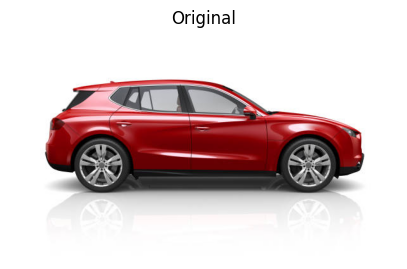

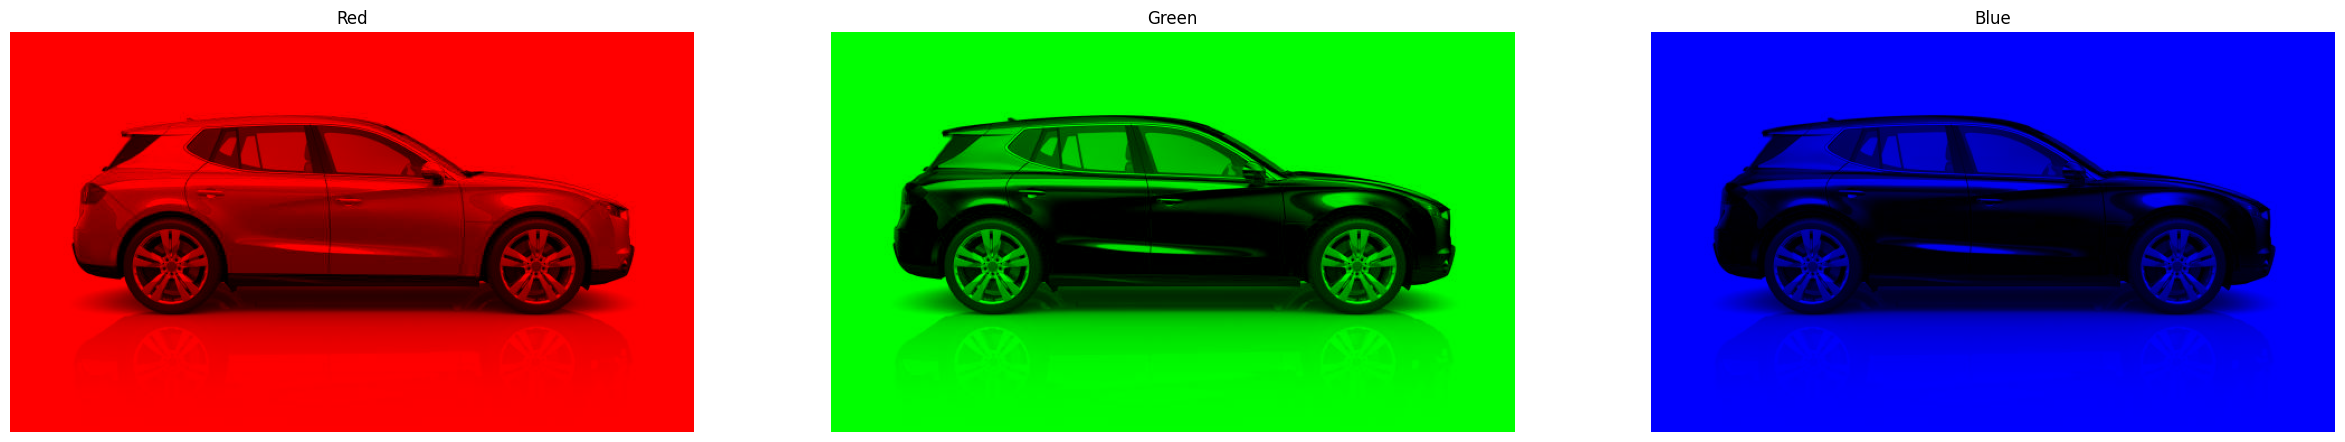

In [31]:
name, filetype, imgarr, width, height = open_img(img)  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb 

CONVERTENDO DE RGB PARA YIQ
CONVERTENDO DE YIQ PARA RGB
SEPARANDO E EXIBINDO CANAIS RGB


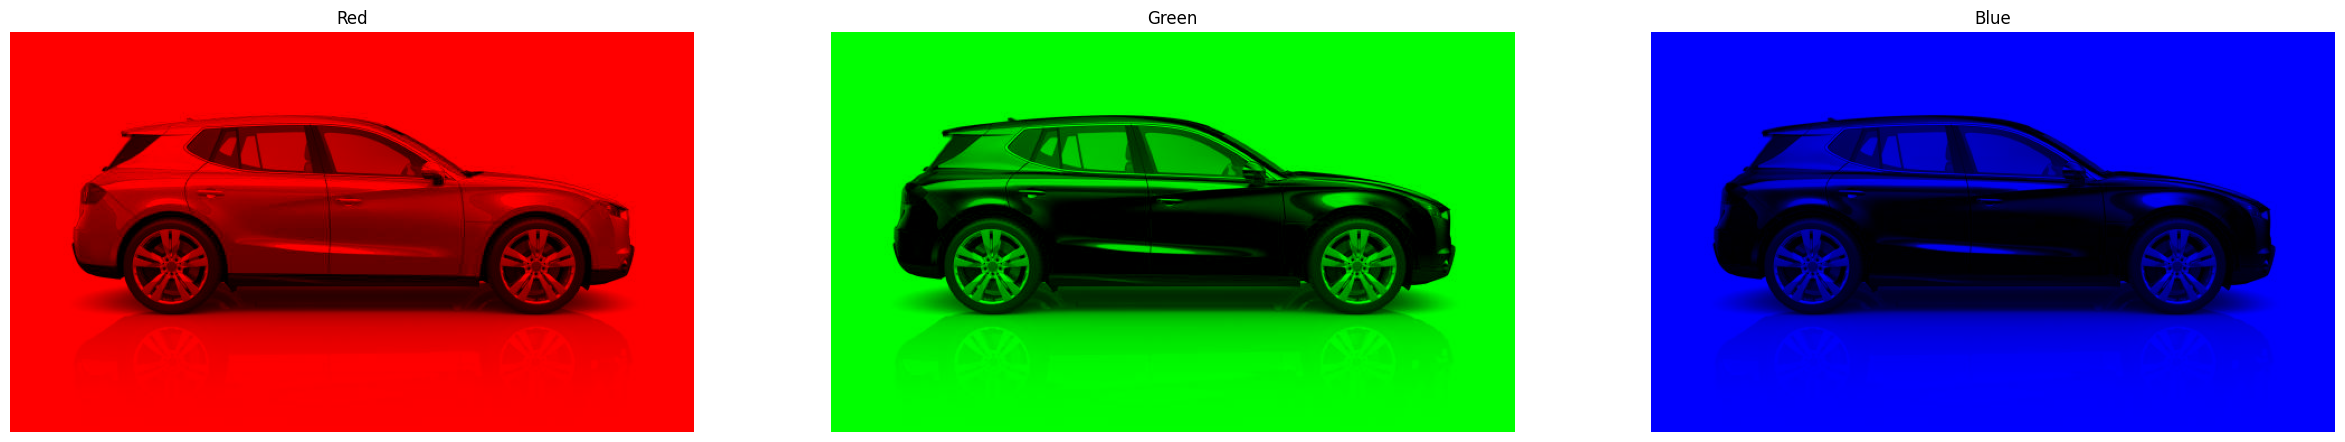

In [32]:
brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) # exibe imagem resultante nos canais após a volta para rgb

2 - Negativo em R, G, B, RGB e Y

In [33]:
def negative(imgarr):
  redneg = imgarr.copy()
  greneg = imgarr.copy()
  bluneg = imgarr.copy()
  neg = imgarr.copy()

  redneg[:,:,0] = 255 - redneg[:,:,0]
  greneg[:,:,1] = 255 - greneg[:,:,1]
  bluneg[:,:,2] = 255 - bluneg[:,:,2]

  neg[:,:,0] = 255 - neg[:,:,0]
  neg[:,:,1] = 255 - neg[:,:,1]
  neg[:,:,2] = 255 - neg[:,:,2]

  fig = plt.figure(figsize=(20, 10))
  fig.add_subplot(2, 2, 1)
  plt.imshow(redneg)
  plt.axis('off')
  plt.title("Red Negative")
  save(redneg, 'img_red_negative', 'jpg')

  fig.add_subplot(2, 2, 2)
  plt.imshow(greneg)
  plt.axis('off')
  plt.title("Green Negative")
  save(greneg, 'img_green_negative', 'jpg')

  fig.add_subplot(2, 2, 3)
  plt.imshow(bluneg)
  plt.axis('off')
  plt.title("Blue Negative")
  save(bluneg, 'img_blue_negative', 'jpg')

  fig.add_subplot(2, 2, 4)
  plt.imshow(neg)
  plt.axis('off')
  plt.title("All negative")
  save(neg, 'img_negative', 'jpg')

In [34]:
def negative_y(yiq, width, height):
    aux = yiq.copy()
    aux[:,:,0] = 255 - aux[:,:,0] 

    neg_y_img = yiq_rgb(aux, width, height)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(neg_y_img)
    plt.axis('off')
    plt.title("Y Negative")
    save(neg_y_img, 'img_y_negative', 'jpg')

CONVERTENDO DE YIQ PARA RGB


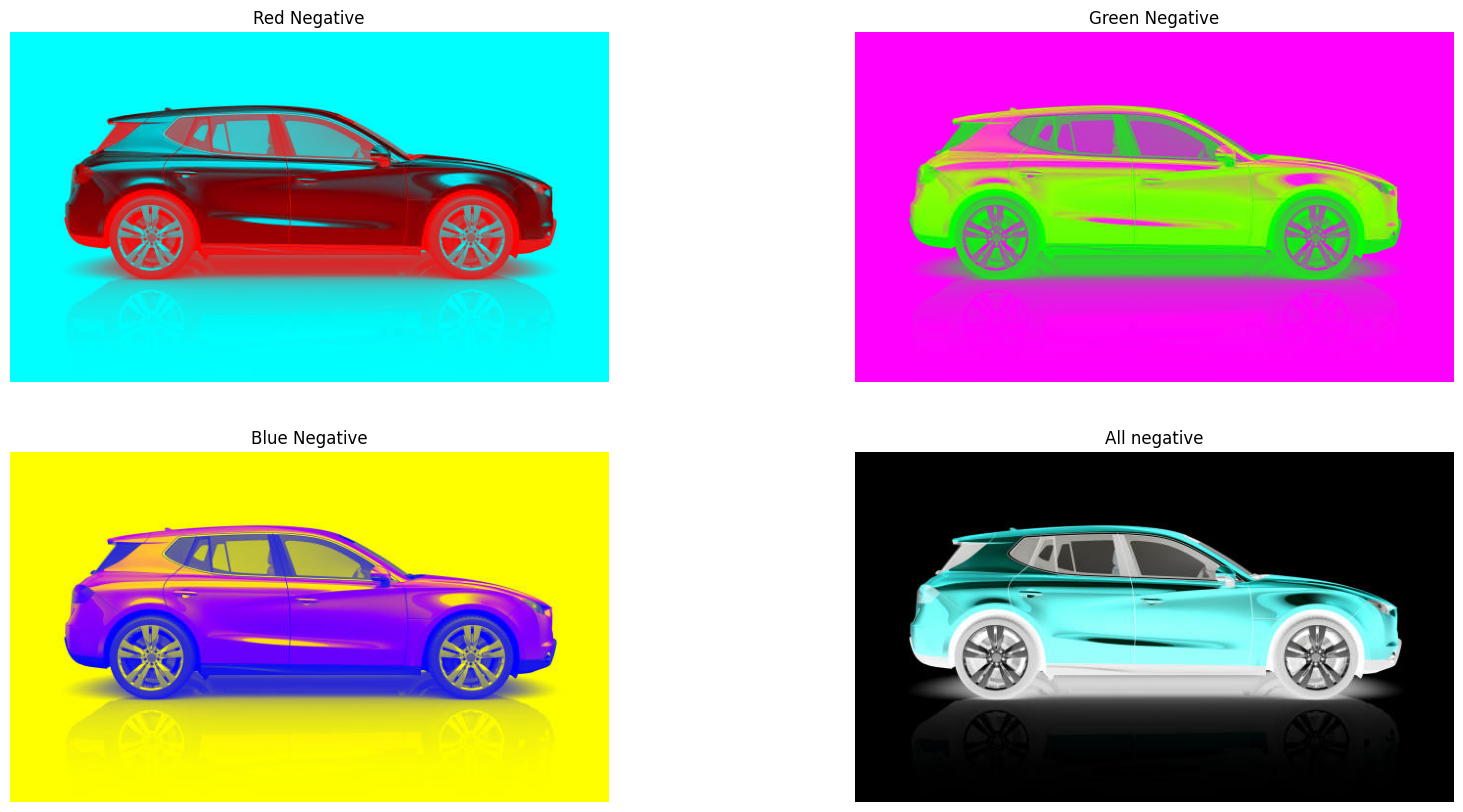

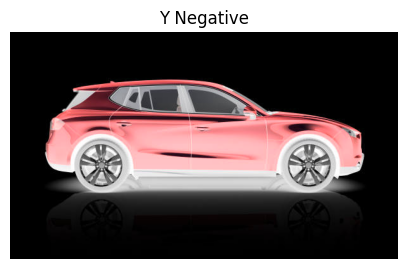

In [35]:
negative(imgarr)

negative_y(brilho, width, height)

5 - Controle de saturação no HSB

In [36]:
def rgb_hsb(imgarr,width,height):
    hsb = np.zeros((height, width, 3))

    for i in range(width):
        for j in range(height):
            r = imgarr[j,i,0]
            g = imgarr[j,i,1]
            b = imgarr[j,i,2]

            pR = r / 255
            pG = g / 255
            pB = b / 255

            high = max(pR, pG, pB)
            low = min(pR, pG, pB)
            delta = high - low

            if (delta == 0):
                hsb[j,i,0] = 0
            elif (high == pR):
                hsb[j,i,0] = (60 * (((pG  - pB) / delta) % 6))
            elif (high == pG):
                hsb[j,i,0] = (60 * (((pB  - pR) / delta) + 2))
            elif (high == pB):
                hsb[j,i,0] = (60 * (((pR  - pG) / delta) + 4))

            if (high == 0):
                hsb[j,i,1] = 0
            else:
                hsb[j,i,1] = delta / high

            hsb[j,i,2] = high

    return hsb
    

In [37]:
def hsb_rgb(hsb, width,height):
    aux = np.zeros((height, width, 3), dtype=np.uint8)
    r1 = 0
    g1 = 0
    b1 = 0

    for i in range(width):
        for j in range(height):
            h = hsb[j][i][0]
            s = hsb[j][i][1]
            b = hsb[j][i][2]

            hs = h / 60.0
            h1 = math.floor(hs)
            sext = int(h1) % 6
            f = hs - h1

            x = b * (1 - s)
            y = b * (1 - f * s)
            z = b * (1 - (1 - f) * s)

            if sext == 0:
                r1 = b
                g1 = z
                b1 = x
            elif sext == 1:
                r1 = y
                g1 = b
                b1 = x
            elif sext == 2:
                r1 = x
                g1 = b
                b1 = z
            elif sext == 3:
                r1 = x
                g1 = y
                b1 = b
            elif sext == 4:
                r1 = z
                g1 = x
                b1 = b
            elif sext == 5:
                r1 = b
                g1 = x
                b1 = y

            aux[j][i][0] = r1 * 255
            aux[j][i][1] = g1 * 255
            aux[j][i][2] = b1 * 255
            
    return aux    

In [38]:
def saturation(imgarr, width, height, num):

    hsb = rgb_hsb(imgarr, width, height)

    aux = hsb.copy()
    
    aux[:,:,1] = aux[:,:,1] * num
    
    for i in range(width):
        for j in range(height):
            if aux[j][i][1] > 1.0:
                aux[j][i][1] = 1.0

    rgb = hsb_rgb(aux, width, height)

    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original saturation")

    fig.add_subplot(1, 2, 2)
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Saturation changed")
    save(rgb, 'img_saturation_change', 'jpg')

    return rgb

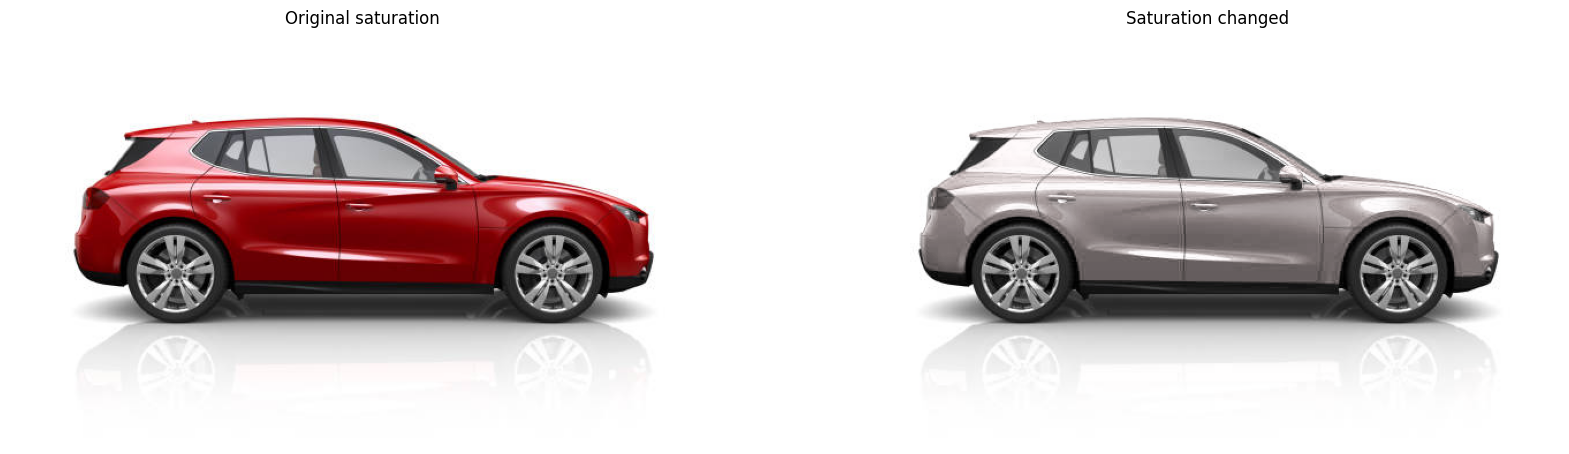

In [39]:
insatured = saturation(imgarr, width, height, 0.07)

4 - Filtro mediana mXn, com m e n ímpares, sobre R, G e B. 

In [40]:
def median_filter(imgarr, height, width, x_filter, y_filter): # considenrando inversão do numpy no height/width
    piv_x = int(x_filter/2)
    piv_y = int(y_filter/2)
    
    #Definindo limites do for com base nos valores ímpares das 
    #dimensões da mascara
    start_r = piv_x
    end_r = width - piv_x
    start_mask_x = -1 * piv_x           # pivo no meio, entao inicio é -pivo
    end_mask_x = piv_x + 1              # pivo+1 porque o for vai ate fim-1
    
    start_c = piv_y
    end_c = height - piv_y
    start_mask_y = -1 * piv_y       
    end_mask_y = piv_y + 1

    w_out = end_r - start_r
    h_out = end_c - start_c

    mask = np.zeros((x_filter, y_filter, 3), dtype=np.uint8)
    out = np.zeros((w_out, h_out, 3), dtype=np.uint8)             

    sel_r = []
    sel_g = []
    sel_b = []

    for i in range(start_r, end_r):
        for j in range(start_c, end_c):
            now_r = i - start_r
            now_c = j - start_c

            for k in range(start_mask_x, end_mask_x):
                for l in range(start_mask_y, end_mask_y):
                    r, g, b = imgarr[i-k][j-l]
                    sel_r.append(r)
                    sel_g.append(g)
                    sel_b.append(b)
            
            out[now_r][now_c][0] = st.median(sel_r) 
            out[now_r][now_c][1] = st.median(sel_g) 
            out[now_r][now_c][2] = st.median(sel_b) 
            
            sel_r = []
            sel_g = []
            sel_b = []
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(out)
    plt.axis('off')
    plt.title(type)
    save(out, 'img_mediana', 'jpg')

    return out

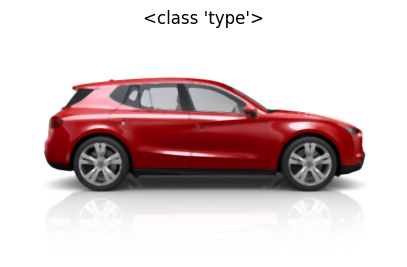

In [41]:
out = median_filter(imgarr, width, height, 5, 5)

3 - Correlação m x n

In [61]:
def open_txt(txt):
    file = open(txt)

    rowMask = int(file.readline())
    columnMask = int(file.readline())
    offset = int(file.readline())
    filterType = file.readline()
    maskData = file.readline()
    maskData = maskData.split()
    maskData = list(map(int, maskData))

    print(f'rows: {rowMask}\ncolumns: {columnMask}\noffset: {offset}\nfilter: {filterType}')
    print(maskData)

    file.close()

    return rowMask, columnMask, filterType, maskData, offset

In [121]:
def zeroExtension(img, rowMask, columnMask):
    top = 0
    bottom = 0
    left = 0
    right = 0

    pivRow = int(rowMask/2)
    pivColumn = int(columnMask/2)

    if (rowMask%2 == 0):
        top = pivRow
        bottom = pivRow - 1
    else:
        top = pivRow
        bottom = pivRow

    if (columnMask%2 == 0):
        left = pivColumn
        right = pivColumn - 1
    else:
        left= pivColumn
        right = pivColumn

    '''print(img.shape[0])
    print(img.shape[1])'''
    #print(f'top {top} bottom {bottom} left {left} right {right}')

    extRows = img.shape[0] + top + bottom
    extColumns = img.shape[1] + left + right

    #print(f'extRows: {extRows}, extColumn: {extColumns}')

    aux = np.zeros((extRows, extColumns, 3), dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            aux[pivRow + i][pivColumn + j][0] = img[i][j][0]
            aux[pivRow + i][pivColumn + j][1] = img[i][j][1]
            aux[pivRow + i][pivColumn + j][2] = img[i][j][2]
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(aux)
    plt.axis('off')
    plt.title("Zero Extension")
    save(aux, 'img_zero_extended', 'jpg')
    
    extendedImg = aux

    return extendedImg

In [124]:
def correlation(img, txt):
    rowMask, columnMask, filterType, maskData, offset = open_txt(txt)

    if rowMask < 1 or columnMask < 1:
        print('As proporções da máscara são inválidas!')
        return
    
    pivRow = int(rowMask/2)
    pivColumn = int(columnMask/2)

    #print(f'pivo x: {pivRow} pivo y: {pivColumn} - size: {img.shape}') 

    extendedImg = zeroExtension(img, rowMask, columnMask)
    



    return 

rows: 9
columns: 3
offset: 0
filter: media

[7, -7, 4, 5, 3, 4, 2, 2, 3]


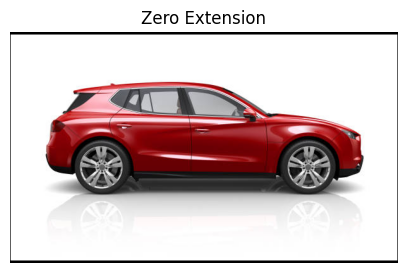

In [126]:
correlation(imgarr, 'correlation_data.txt')

In [45]:
# ---------------- MAIN ----------------------- 

'''name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb

brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) 

#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')

negative(imgarr)

negative_y(brilho, width, height)'''

"name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo\n\nvermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb\n\nbrilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq\n\nconv = yiq_rgb(brilho, width, height) # converte para rgb\n\nred2, green2, blue2 = split_rgb(conv, width, height) \n\n#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')\n\nnegative(imgarr)\n\nnegative_y(brilho, width, height)"

In [ ]:
def zeroExtension(img, pivRow, pivColumn):
    top = 0
    bottom = 0
    left = 0
    right = 0

    if (pivRow%2 == 0):
        top = int(pivRow/2)
        bottom = int((pivRow - 1)/2)
    else:
        print('else1')
        top = int(pivRow/2)
        bottom = int(pivRow/2)

    if (pivColumn%2 == 0):
        left = int(pivColumn/2)
        right = int((pivColumn - 1)/2)
    else:
        print('else2')
        left = int(pivColumn/2)
        right = int(pivColumn/2)

    '''print(img.shape[0])
    print(img.shape[1])'''
    print(f'top {top} bottom {bottom} left {left} right {right}')

    extRows = img.shape[0] + top + bottom
    extColumns = img.shape[1] + left + right

    print(f'extRows: {extRows}, extColm: {extColumns}')

    aux = np.zeros((extRows, extColumns, 3), dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            aux[pivColumn + i][pivRow + j][0] = img[i][j][0]
            aux[pivColumn + i][pivRow + j][1] = img[i][j][1]
            aux[pivColumn + i][pivRow + j][2] = img[i][j][2]
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(aux)
    plt.axis('off')
    plt.title("Zero Extension")
    save(aux, 'img_zero_extended', 'jpg')
    
    extendedImg = aux

    return extendedImg

In [46]:
def median_filter_old(imgarr, height, width, x_filter, y_filter, type): # considenrando inversão do numpy no height/width
    piv_x = int(x_filter/2)
    piv_y = int(y_filter/2)
    
    #Definindo limites do for com base nos valores ímpares das 
    #dimensões da mascara
    start_r = piv_x
    end_r = width - piv_x
    start_mask_x = -1 * piv_x           # pivo no meio, entao inicio é -pivo
    end_mask_x = piv_x + 1              # pivo+1 porque o for vai ate fim-1
    
    start_c = piv_y
    end_c = height - piv_y
    start_mask_y = -1 * piv_y       
    end_mask_y = piv_y + 1

    w_out = end_r - start_r
    h_out = end_c - start_c

    mask = np.zeros((x_filter, y_filter, 3), dtype=np.uint8)
    out = np.zeros((w_out, h_out, 3), dtype=np.uint8)             

    sel_r = []
    sel_g = []
    sel_b = []

    for i in range(start_r, end_r):
        for j in range(start_c, end_c):
            now_r = i - start_r
            now_c = j - start_c

            for k in range(start_mask_x, end_mask_x):
                for l in range(start_mask_y, end_mask_y):
                    r, g, b = imgarr[i-k][j-l]
                    sel_r.append(r)
                    sel_g.append(g)
                    sel_b.append(b)
            
            if (type == 'mediana'):
                out[now_r][now_c][0] = st.median(sel_r) 
                out[now_r][now_c][1] = st.median(sel_g) 
                out[now_r][now_c][2] = st.median(sel_b) 
            elif (type == 'media'):
                out[now_r][now_c][0] = int(st.mean(sel_r)) 
                out[now_r][now_c][1] = int(st.mean(sel_g)) 
                out[now_r][now_c][2] = int(st.mean(sel_b))

            sel_r = []
            sel_g = []
            sel_b = []
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(out)
    plt.axis('off')
    plt.title(type)
    save(out, 'img_' + type, 'jpg')

    return out